<a href="https://colab.research.google.com/github/Murakami-Shoya/everyday_programming/blob/master/AI_100knock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 教師あり学習

In [4]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [10]:
# データの読み出し
housing = fetch_california_housing()
f_df = pd.DataFrame(housing.data, columns=housing.feature_names)
t_df = pd.DataFrame(housing.target, columns=housing.target_names)
df = pd.concat([f_df, t_df], axis=1)
display(df.head())
# housing

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### データの概要

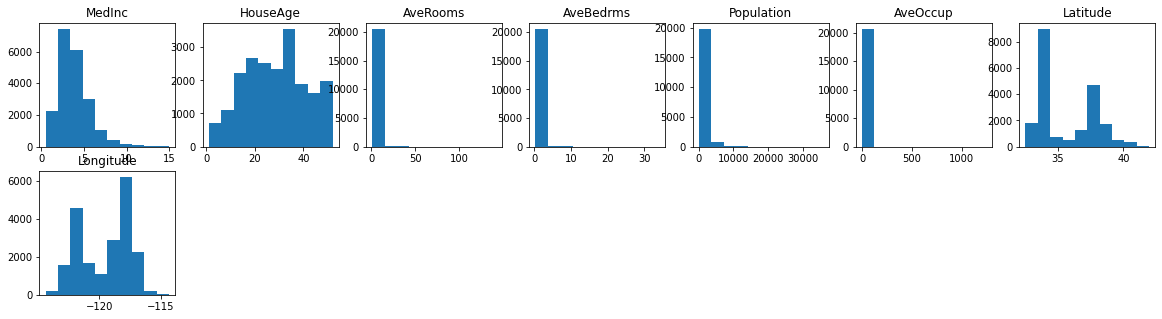

In [ ]:
plt.figure(figsize=(20, 5))
for i, col in enumerate(df.columns):
    plt.subplot(2, 7, i+1)
    plt.hist(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

### 相関

多重共線性(説明変数同士の相関が強い)がないようにする

ヒートマップで可視化する

In [11]:
df_corr = df.corr()
display(df_corr)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


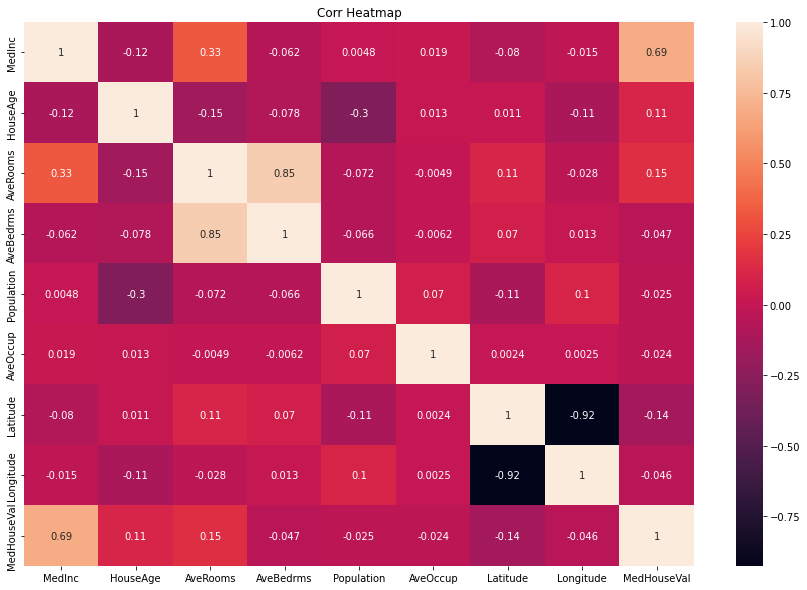

In [12]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_corr, annot=True)
plt.title("Corr Heatmap")
plt.show()

### 単回帰

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [32]:
x = df[['MedHouseVal']] # 一番相関高い変数で単回帰
y = t_df

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print(x_train.shape, y_train.shape)

linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)

(14448, 1) (14448, 1)


LinearRegression()

In [34]:
print(linear_reg.predict(x_train))
print(linear_reg.predict(x_test))

[[1.938]
 [1.697]
 [2.598]
 ...
 [2.221]
 [2.835]
 [3.25 ]]
[[0.477  ]
 [0.458  ]
 [5.00001]
 ...
 [2.184  ]
 [1.194  ]
 [2.098  ]]
